%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
What is your portfolio weight for Facebook?: 30
What is your portfolio weight for Google?: 10
What is your portfolio weight for JP Morgan?: 70

Whoops! Please make sure portfolio weights equal 100%
What is your portfolio weight for Facebook?: 30
What is your portfolio weight for Google?: 20
What is your portfolio weight for JP Morgan?: 50

Thank you, your weights are equal to 100%


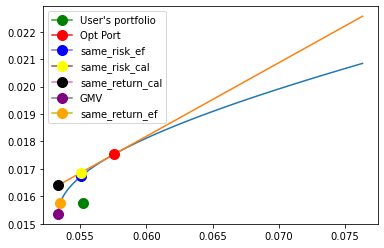

,Initial Portfolio,Efficient Risky Portfolio 1,Efficient Risky Portfolio 2,Optimal Portfolio 1,Optimal Portfolio 2
Expected Return,0.015749,0.015749,0.015743,0.016863,0.016402
Standard Deviation,0.055183,0.055058,0.053478,0.055058,0.053341
Sharpe Ratio,0.247648,0.248212,0.255431,0.268441,0.268441
Weight_FB,30.000000,66.689198,79.591498,39.473253,36.498747
Weight_GOOG,20.000000,37.828917,35.438938,40.711567,37.643748
Weight_JPM,50.000000,-4.518114,-15.030436,15.513375,14.344365
Weight_RF,0.000000,0.000000,0.000000,0.043018,0.115131


In [1]:
# Import all necessary packages
import pandas as pd
import scipy as sp
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
%pylab inline


#Read in the data from the excel file provided for the assignment
data = pd.read_excel('Raw Adjusted Prices (FB, GOOG, JPM) (2015-2020).xlsx')

#Create a df labeled returns that calculates the daily returns for each of the equities 
returns = pd.DataFrame()
returns['FB_return'] = data['FB'].pct_change()
returns['GOOG_return'] = data['GOOG'].pct_change()
returns['JPM_return'] = data['JPM'].pct_change()

#Calculate the average returns for each of the equities
FB_avg_return = returns['FB_return'].mean()
GOOG_avg_return = returns['GOOG_return'].mean()
JPM_avg_return = returns['JPM_return'].mean()

#Calculate the variances for each of the three equities
FB_var = returns['FB_return'].var()
GOOG_var = returns['GOOG_return'].var()
JPM_var = returns['JPM_return'].var()

#Calcuate the standard deviation for each of the equities
FB_std = math.sqrt(FB_var)
GOOG_std = math.sqrt(GOOG_var)
JPM_std = math.sqrt(JPM_var)

#Create a 3x3 covariance matrix 
cov_mat = returns.cov()
cov_mat = numpy.matrix(cov_mat)

#The two below functions are validation to make sure the user is prompted to enter whole numbers, not letters or blank inputs
#Function that checks if the user input is a string instead of an integer of floating point number
def check_user_input(input):
    try:
        # Convert it into integer
        val = float(input)
       # print("Input is an integer number. Number = ", val)
    except ValueError:
            print()
            print("You inputted a string instead of a number, try again")
            return False 

        
def validate_weights(stock):
    dummy = -1
    while dummy == -1:
        weight = input("What is your portfolio weight for " + stock + "?: ")
        if check_user_input(weight) == False:
            dummy = -1
            print("Please enter a number between 0 and 100")
        else:
            dummy = 1
    return float(weight)

#This block of code is the querying portion of the assignment that asks the user for the current weights of their portfolio
Input = False

while Input == False:
    
    FB_weight = validate_weights('Facebook')
    GOOG_weight = validate_weights('Google')
    JPM_weight = validate_weights('JP Morgan')

    if FB_weight + GOOG_weight + JPM_weight == 100.0:
        print()
        print('Thank you, your weights are equal to 100%')
        Input = True
    else:
        print()
        print("Whoops! Please make sure portfolio weights equal 100%")
        False
        

#Create df's of user_weights and average returns to then get these values in to a matrix
user_weights = pd.DataFrame([FB_weight, GOOG_weight, JPM_weight]) / 100
user_weights = np.matrix(user_weights)
avg_returns = pd.DataFrame([FB_avg_return, GOOG_avg_return, JPM_avg_return ])
avg_returns = np.matrix(avg_returns)

#This is the expected return of the user's current portfolio given the weights they previously inputted
sample_expected_return = user_weights.T.dot(avg_returns)

#This is the variance of the user's current portfolio
variance_user_port = user_weights.T.dot(cov_mat).dot(user_weights)

#This is the standard deviation of the user's current portfolio
stand_dev_user_port = math.sqrt(variance_user_port)

#Find and label the monthly risk-free rate
rf_annual = .025
rf_monthly = rf_annual / 12

#Sharpe of users current portfolio
sharpe_users_port = (sample_expected_return - rf_monthly) / stand_dev_user_port

#Point on graph that indicates users current portfolio
user_x = stand_dev_user_port
user_y = float(sample_expected_return)

#Global Minimum Variance Portfolio
# A^-1 * b = Weights of the GMT

#The following block produces the inverted 4x4 matrix (known as A-1 in the formula from class)
e = np.vstack(cov_mat)
a = np.array([1,1,1])
cov_mat_2 = cov_mat *2
b = np.vstack((cov_mat_2, a))
a = np.matrix([1,1,1,0])
a = np.array(a)
a = np.transpose(a)
c = np.hstack((b,a))
d=np.linalg.inv(c)

#This block of code finds the weights of the GMV portfolio by multiplying the 4x4 matrix (A-1) by the 4x1 matrix (b)
fin = np.matrix([0,0,0,1])
fin = np.array(fin)
fin = np.transpose(fin)
GMV_Matrix = d.dot(fin)
GMV_Weights = np.delete(GMV_Matrix, 3, 0)

#Using the previously found GMV weights, we can find the variance of the GMV portfolio
global_minimum_return = GMV_Weights.T.dot(avg_returns)
global_minimum_variance = GMV_Weights.T.dot(cov_mat).dot(GMV_Weights)

#Standard deviation of the GMV portfolio
global_minimum_std = math.sqrt(global_minimum_variance)

#The following block find the weights, expected return, variance, and standard deviation of the maximum return portfolio
avg_returns = np.array(avg_returns)
cov_mat_2 = cov_mat *2
b = np.hstack((cov_mat_2, avg_returns))
new_avg_returns = np.append(avg_returns, 0)
new_avg_returns = np.transpose(new_avg_returns)
c = np.vstack((b,new_avg_returns))

i1 = np.matrix([1,1,1,0])
i1 = np.array(i1.T)

d = np.hstack((c,i1))
i2 = np.matrix([1,1,1,0,0])
e = np.vstack((d,i2))

f=np.linalg.inv(e)
f
mustar = avg_returns.max()
b_array = np.matrix(np.array([0,0,0,mustar,1]))
b_array = np.array(b_array.T)
b_array
Max_Weights = f.dot(b_array)
Max_Weights = np.delete(Max_Weights, (3,4), 0)
global_maximum_return = Max_Weights.T.dot(avg_returns)
global_maximum_variance = Max_Weights.T.dot(cov_mat).dot(Max_Weights)
global_maximum_std = math.sqrt(global_maximum_variance)

#Covariance of the GMV port and Max Return Port: 
# (W prime GMV) (sigma) (W Max Return Port)
cov_GMV_Maxret = GMV_Weights.T.dot(cov_mat).dot(GMV_Weights)

#For loop to find all points on efficient frontier: 
efficient_frontier_X = []
efficient_frontier_Y = []
alpha = []
for i in range(0,101,1):
    
    alpha.append(i)
    efficient_frontier_X.append(math.sqrt((((i/100)**2)*(global_minimum_variance)) + ((((100-i)/100)**2)*(global_maximum_variance)) + (2*(i/100)*((100-i)/100)*cov_GMV_Maxret)))

    efficient_frontier_Y.append((global_minimum_return * (i/100)) + (((100-i)/100) * global_maximum_return))
    
efficient_frontier_X = efficient_frontier_X[::-1]
efficient_frontier_Y = efficient_frontier_Y[::-1]

#Transpose the covariance matrix for our calculations
cov_mat_1 = cov_mat.T

#For optimization of the ORP, we find the MRP of each equity
stock_MRP = np.array((FB_avg_return, GOOG_avg_return, JPM_avg_return))
stock_MRP = ((stock_MRP - rf_monthly)*1)

#Transpose the matrix of 1's for the calculations according to matrix notation
one = np.matrix((1,1,1))
one_prime = one.T

#Find the weights of the ORP
one_prime = np.matrix(one_prime)
cov_mat_inverse=np.linalg.inv(cov_mat)
numerator = cov_mat_inverse.dot(stock_MRP)
orp_weights = numerator/numerator.sum()

#Find the sharpe ratio of the ORP
avg_returns_t = avg_returns.T
orp_er = orp_weights.dot(avg_returns)
orp_var = orp_weights.dot(cov_mat).dot(orp_weights.T)
orp_std = math.sqrt(orp_var)
sharpe_orp = (orp_er-rf_monthly)/orp_std

#Rename variables for plotting purposes later in the project
orp_x = orp_std
orp_y = orp_er

#Finding slope of the CAL by using a combiniation of the rf_rate and the orp_er
#We chose the arbitrary weights of 30/70
expected_return_rf_orp_port = (0.3 * rf_monthly) + (0.7 * orp_er)
variance_rf_orp_port = (0.7**2)*(orp_er**2)
std_rf_orp_port = math.sqrt(variance_rf_orp_port)
sharpe_rf_orp_port = (orp_er - rf_monthly)/std_rf_orp_port

sharpe_orp_1 = np.array(sharpe_orp)
efx = efficient_frontier_X[::-1]

lst = [0] * 101
x_vals = efx*1
b = []
for i in range(0,len(efx),1):
    b.append(efx[i]*sharpe_orp_1[0][0] + rf_monthly)
    
#Use a for loop to suggest a portfolio on the EF that has the same closest standard deviation to the users portfolio
#Standard deviations will not be exact since we used a gradation of 1%
a = 0

for i in range(0,len(efficient_frontier_X),1):
    if stand_dev_user_port == efficient_frontier_X[i]:
        suggested_port = i
        break
    else: 
        if stand_dev_user_port < efficient_frontier_X[i]:
            a = i
            break
dist_greater = abs(efficient_frontier_X[a] - stand_dev_user_port)

dist_lower = abs(efficient_frontier_X[a-1] - stand_dev_user_port)
        
if dist_greater > dist_lower:
    suggested_port = a
else:
    suggested_port = a -1
    
#Use a for loop to suggest a portfolio on the CAL that matches the same return as the user's portfolio  
q = 0
isTrue = False

for i in range(0, len(b), 1):
    if(user_y == b[i]):
        cal_expected = i
        isTrue = True
        break
    else:
        if user_y > b[i]:
            isTrue = True
            q = i
            break
dist_greater = abs(b[i]- user_y)

dist_lower = abs(b[i]-user_y)

if dist_greater > dist_lower:
    cal_expected = q-1
else:
    cal_expected = q


#For loop that suggests a portfolio on the EF that matches the same return as the user's portfolio    
p = 0
y_array = np.array(efficient_frontier_Y)
for i in range(0, len(y_array), 1):
    if(user_y == y_array[i][0]):
        ef_samer = i
        break
    else:
        if user_y < y_array[i][0]:
            p = i
            break
dist_greater = abs(y_array[i][0]- user_y)

dist_lower = abs(y_array[i][0]-user_y)

if dist_greater > dist_lower:
    ef_samer = p
else:
    ef_samer = p-1

#This block plots all of the required parameters for the assignment
EF = pd.DataFrame()
EF['x_cord'] = efficient_frontier_X
EF['y_cord'] = efficient_frontier_Y

plt.plot(EF['x_cord'],EF['y_cord'])
plt.plot(efx,b)
x = user_x
y = user_y
plt.plot(user_x, user_y, marker="o", markersize=10, markeredgecolor="green", markerfacecolor="green", label= "User's portfolio")
plt.plot(orp_x, orp_y, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red", label = "Opt Port")
plt.plot(efficient_frontier_X[suggested_port], efficient_frontier_Y[suggested_port], marker="o", markersize=10, markeredgecolor="blue", markerfacecolor="blue", label = "same_risk_ef")
plt.plot(efx[-(suggested_port+1)], b[-(suggested_port+1)], marker = "o", markersize =10, markeredgecolor = "yellow", markerfacecolor = "yellow", label = "same_risk_cal")
if(isTrue == False):
    plt.plot(efficient_frontier_X[0], b[-1], marker = "o", markersize =10, markeredgecolor = "black", markerfacecolor = "black", label = "same_return_cal")
else:
    plt.plot(efx[cal_expected], b[cal_expected], marker = "o", markersize =10, markeredgecolor = "black", markerfacecolor = "black", label = "same_retrun_cal")
plt.plot(efficient_frontier_X[0], efficient_frontier_Y[0], marker = "o", markersize =10, markeredgecolor = "purple", markerfacecolor = "purple", label= "GMV")
plt.plot(efficient_frontier_X[ef_samer], efficient_frontier_Y[ef_samer], marker = "o", markersize =10, markeredgecolor = "orange", markerfacecolor = "orange", label = "same_return_ef")
plt.legend()
plt.show()

efficient_frontier_Y[suggested_port] = user_weights.T.dot(avg_returns)
recreat_weights = efficient_frontier_Y[suggested_port].dot(avg_returns.T)
recreat_weights = np.array(recreat_weights)

#print(recreat_weights[0][0], " ", recreat_weights[0][1], " ", recreat_weights[0][2] )


#From here on we will create the table displaying the attributes that make up each specific portfolio
#Green
initial_port_attributes = [float(sample_expected_return),float(stand_dev_user_port),float(sharpe_users_port), \
                          FB_weight, GOOG_weight, JPM_weight, 0]

#Blue
blue_weights=GMV_Weights*(alpha[suggested_port]/100) + (1-(alpha[suggested_port]/100))*Max_Weights
efficient_std_port = [float(efficient_frontier_Y[suggested_port]), float(efficient_frontier_X[suggested_port]), \
float((efficient_frontier_Y[suggested_port] - rf_monthly)/efficient_frontier_X[suggested_port]),float( blue_weights[0])*100, float(blue_weights[1])*100, float(blue_weights[2])*100, 0]

#Orange
orange_weights=GMV_Weights*(alpha[ef_samer]/100) + (1-(alpha[ef_samer]/100))*Max_Weights
efficient_return_port = [float(efficient_frontier_Y[ef_samer]), float(efficient_frontier_X[ef_samer]), \
float((efficient_frontier_Y[ef_samer] - rf_monthly)/ efficient_frontier_X[ef_samer]),float(orange_weights[0])*100,float(orange_weights[1])*100,float(orange_weights[2])*100,0 ]

slope1 = (orp_y - rf_monthly)/orp_x

distance = orp_y - rf_monthly
change_rf = (efx[-(suggested_port+1)]-orp_x)*slope1
percent_rf = (change_rf/distance)

same_risk_cal_weights = orp_weights.T * (1+percent_rf)


#Yellow
optimal_std_port = [float(b[-(suggested_port+1)]), float(efx[-(suggested_port+1)]), \
                   float((b[-(suggested_port+1)] - rf_monthly)/efx[-(suggested_port+1)]),float(same_risk_cal_weights[0])*100,float(same_risk_cal_weights[1])*100,float(same_risk_cal_weights[2])*100, float(-percent_rf)]


#Black
if(isTrue == False):
    percent_rf = (user_y-orp_y)/distance
    same_return_cal_weights = orp_weights.T *(1+percent_rf)
    optimal_return_port = [float(b[-1]), efficient_frontier_X[0], float((b[-1] - rf_monthly)/efficient_frontier_X[0]),float(same_return_cal_weights[0])*100, float(same_return_cal_weights[1])*100, float(same_return_cal_weights[2])*100, float(-percent_rf)]
else:
    percent_rf = (b[cal_expected]-orp_y)/distance
    same_return_cal_weights = orp_weights.T*(1+percent_rf)
    optimal_return_port = [float(b[cal_expected]), float(efx[cal_expected]), float((b[cal_expected]-rf_monthly)/efx[cal_expected])\
                          , float(same_return_cal_weights[0])*100, float(same_return_cal_weights[1])*100,\
                           float(same_return_cal_weights[2])*100, float(-percent_rf)]
    
    
#DataFrame of outputs

Outputs = pd.DataFrame(index = [['Expected Return', 'Standard Deviation',\
                                    'Sharpe Ratio', 'Weight_FB','Weight_GOOG','Weight_JPM', 'Weight_RF']])

Outputs['Initial Portfolio'] = initial_port_attributes

Outputs['Efficient Risky Portfolio 1'] = efficient_std_port

Outputs['Efficient Risky Portfolio 2'] = efficient_return_port

Outputs['Optimal Portfolio 1'] = optimal_std_port

Outputs['Optimal Portfolio 2'] = optimal_return_port




Outputs
